## Capital asset pricing model

Import packages.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

Select a stock and its market.

In [15]:
stock = 'AAPL'  
market = 'IVV' 

Fetch the data.

In [16]:
stock_data = yf.download(stock, period="1y", interval="1d")
market_data = yf.download(market, period="1y", interval="1d")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Calculate daily returns.

In [17]:
stock_returns = stock_data['Adj Close'].pct_change().dropna()
market_returns = market_data['Adj Close'].pct_change().dropna()

Align the data to a Pandas dataframe.

In [18]:
returns = pd.concat([stock_returns, market_returns], axis=1).dropna()
returns.columns = ['Stock', 'Market']

Prepare the data for regression.

In [19]:
X = returns['Market'].values.reshape(-1, 1)
y = returns['Stock'].values

Conduct the regression analysis then calculate the alpha and beta values.

In [20]:
model = LinearRegression().fit(X, y)
alpha = model.intercept_
beta = model.coef_[0]

Predict the stock returns based on the market returns.

In [21]:
predictions = model.predict(X)

Calculate the Root Mean Squared Error (RMSE).

In [22]:
rmse = root_mean_squared_error(y, predictions)

Calculate and plot the residuals to check for linearity.

Text(0.5, 1.0, 'Residuals Plot')

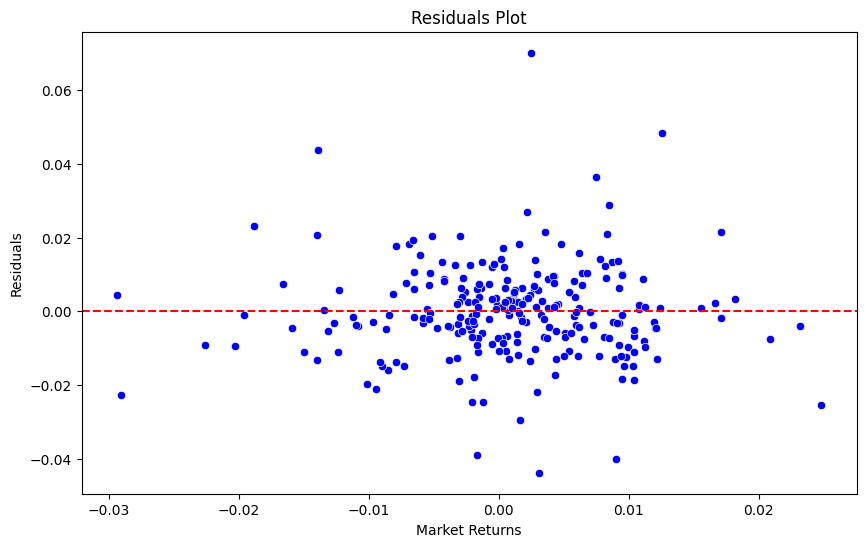

In [23]:
residuals = y - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=returns['Market'], y=residuals, color='blue', label='Residuals', legend=False)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Market Returns')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

Calculate the R-squared value.

In [24]:
r_squared = r2_score(y, predictions)

Display metrics.

In [25]:
print(f'Alpha(intercept): {alpha}')
print(f'Beta(slope): {beta}')
print("Root Mean Squared Error:", rmse)
print(f'R-squared: {r_squared}')

Alpha(intercept): 0.0002518072646242789
Beta(slope): 0.8845433895529986
Root Mean Squared Error: 0.012818243835936119
R-squared: 0.23407082038139992


Plot the regression line.

Text(0.5, 1.0, 'Scatterplot of IVV vs AAPL Returns with Regression Line')

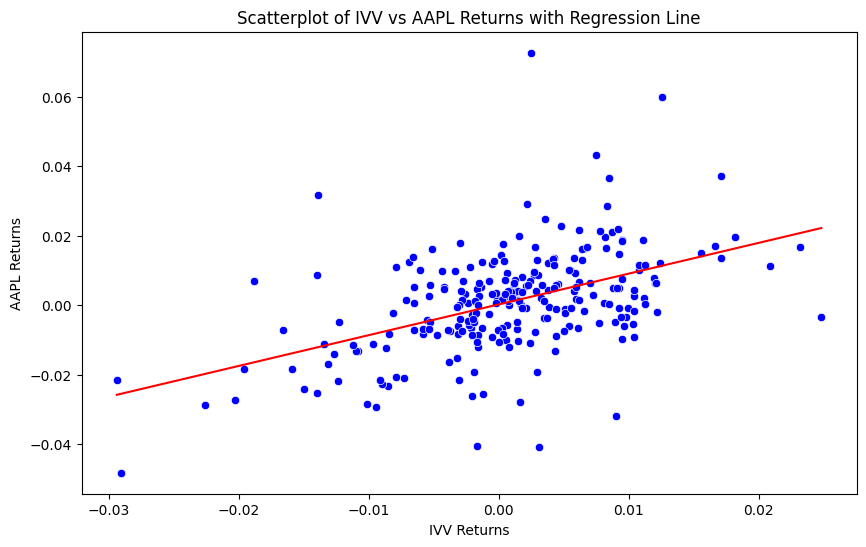

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=returns['Market'], y=returns['Stock'], color='blue', label='Data points', legend=False)
sns.lineplot(x=returns['Market'], y=predictions, color='red', label='Regression line', legend=False)
plt.xlabel(f'{market} Returns')
plt.ylabel(f'{stock} Returns')
plt.title(f'Scatterplot of {market} vs {stock} Returns with Regression Line')